In [42]:
import pandas as pd

wallet_df = pd.read_csv('/content/Wallet id - Sheet1.csv')

wallet_df.columns = wallet_df.columns.str.strip()
wallet_df.rename(columns={wallet_df.columns[0]: 'wallet_id'}, inplace=True)

print(wallet_df.head())
print("Total wallets:", len(wallet_df))


                                    wallet_id
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3
1  0x06b51c6882b27cb05e712185531c1f74996dd988
2  0x0795732aacc448030ef374374eaae57d2965c16c
3  0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
4  0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae
Total wallets: 103


 Fetch Transaction History from Compound V2/V3

In [43]:
import requests
import pandas as pd
import time

wallet_df = pd.read_csv('/content/Wallet id - Sheet1.csv')
wallet_addresses = wallet_df.iloc[:, 0].dropna().unique().tolist()
print(f"Loaded {len(wallet_addresses)} wallet addresses.")

API_KEY = "cqt_rQmwcFtPV7GFDh8hqhQKCQvmMfmt"

chain_id = 1

sample_wallets = wallet_addresses[:2]

def fetch_transactions(wallet):
    url = f"https://api.covalenthq.com/v1/{chain_id}/address/{wallet}/transactions_v2/?key={API_KEY}"
    response = requests.get(url)

    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching {wallet}: Status Code {response.status_code}")
        return None

for wallet in sample_wallets:
    print(f"\nFetching transactions for: {wallet}")
    data = fetch_transactions(wallet)
    if data and data.get("data"):
        txs = data["data"].get("items", [])
        print(f"   Total Transactions Fetched: {len(txs)}")
        if txs:
            print("  Sample Transaction:")
            print(f"     Hash: {txs[0].get('tx_hash')}")
            print(f"     From: {txs[0].get('from_address')}")
            print(f"     To:   {txs[0].get('to_address')}")
            print(f"     Value: {txs[0].get('value')}")
    time.sleep(1)


Loaded 103 wallet addresses.

Fetching transactions for: 0x0039f22efb07a647557c7c5d17854cfd6d489ef3
   Total Transactions Fetched: 100
  Sample Transaction:
     Hash: 0x98703fb4a7c6804d82e98f009ecc0e089abd53de94696088fb9675dde740c570
     From: 0xc6b602de080fc9ac9d96a431b2d749d38e77cbbc
     To:   0x13173761e24c3708495b1dd314920f67f97011d0
     Value: 0

Fetching transactions for: 0x06b51c6882b27cb05e712185531c1f74996dd988
   Total Transactions Fetched: 5
  Sample Transaction:
     Hash: 0x2ef861c6dee8c0e5b9a6a621d5b7b2a92cf841cd2c2351a6f33a20ca88ad3c4e
     From: 0x06b51c6882b27cb05e712185531c1f74996dd988
     To:   0x993035f1abf433ef36c39e3a5a260174a6919c31
     Value: 5701850000000000


using your Covalent API key to  Fetch Compound Transactions

In [44]:
import requests
import pandas as pd
import time
import json

wallet_df = pd.read_csv('/content/Wallet id - Sheet1.csv')
wallet_addresses = wallet_df.iloc[:, 0].dropna().unique().tolist()
print(f"Loaded {len(wallet_addresses)} wallet addresses.")

API_KEY = "cqt_rQmwcFtPV7GFDh8hqhQKCQvmMfmt"
chain_id = 1

wallet_transactions = {}

def fetch_transactions(wallet):
    url = f"https://api.covalenthq.com/v1/{chain_id}/address/{wallet}/transactions_v2/?key={API_KEY}"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        print(f"Error fetching {wallet}: Status Code {response.status_code}")
        return None

for i, wallet in enumerate(wallet_addresses):
    print(f"[{i+1}/{len(wallet_addresses)}] Fetching: {wallet}")
    data = fetch_transactions(wallet)
    if data and data.get("data"):
        txns = data["data"].get("items", [])
        wallet_transactions[wallet] = txns
        print(f"   Fetched {len(txns)} transactions.")
    else:
        wallet_transactions[wallet] = []
        print("    No data or error.")

    time.sleep(1)

with open('/content/wallet_transactions.json', 'w') as f:
    json.dump(wallet_transactions, f)

print("\nAll transactions fetched and saved to wallet_transactions.json")


Loaded 103 wallet addresses.
[1/103] Fetching: 0x0039f22efb07a647557c7c5d17854cfd6d489ef3
   Fetched 100 transactions.
[2/103] Fetching: 0x06b51c6882b27cb05e712185531c1f74996dd988
   Fetched 5 transactions.
[3/103] Fetching: 0x0795732aacc448030ef374374eaae57d2965c16c
   Fetched 4 transactions.
[4/103] Fetching: 0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9
   Fetched 80 transactions.
[5/103] Fetching: 0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae
   Fetched 5 transactions.
[6/103] Fetching: 0x104ae61d8d487ad689969a17807ddc338b445416
   Fetched 6 transactions.
[7/103] Fetching: 0x111c7208a7e2af345d36b6d4aace8740d61a3078
   Fetched 6 transactions.
[8/103] Fetching: 0x124853fecb522c57d9bd5c21231058696ca6d596
   Fetched 7 transactions.
[9/103] Fetching: 0x13b1c8b0e696aff8b4fee742119b549b605f3cbc
   Fetched 4 transactions.
[10/103] Fetching: 0x1656f1886c5ab634ac19568cd571bc72f385fdf7
   Fetched 100 transactions.
[11/103] Fetching: 0x1724e16cb8d0e2aa4d08035bc6b5c56b680a3b22
   Fetched 6 transactio

transactions saved to csv

In [45]:
import json
import pandas as pd

with open('/content/wallet_transactions.json', 'r') as f:
    wallet_transactions = json.load(f)

all_transactions = []

for wallet, txns in wallet_transactions.items():
    for tx in txns:
        all_transactions.append({
            "wallet_address": wallet,
            "tx_hash": tx.get("tx_hash"),
            "block_signed_at": tx.get("block_signed_at"),
            "from_address": tx.get("from_address"),
            "to_address": tx.get("to_address"),
            "value": int(tx.get("value", 0)),
            "gas_spent": int(tx.get("gas_spent", 0)),
            "gas_price": int(tx.get("gas_price", 0)),
            "successful": tx.get("successful"),
            "contract_address": tx.get("contract_address"),
            "tx_type": tx.get("tx_type"),
            "fees_paid": int(tx.get("gas_spent", 0)) * int(tx.get("gas_price", 0)) / 1e18  # in ETH
        })

df = pd.DataFrame(all_transactions)

csv_path = "/content/all_wallet_transactions.csv"
df.to_csv(csv_path, index=False)

print(f" Saved {len(df)} transactions to {csv_path}")


 Saved 2823 transactions to /content/all_wallet_transactions.csv


Feature Extraction from Wallet Transactions

In [46]:
import pandas as pd
import numpy as np
from datetime import datetime

df = pd.read_csv('/content/all_wallet_transactions.csv')

df['block_signed_at'] = pd.to_datetime(df['block_signed_at'])

numeric_cols = ['value', 'fees_paid', 'gas_spent', 'gas_price']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

features = []

for wallet, group in df.groupby("wallet_address"):
    total_txns = len(group)
    total_value = group["value"].sum() / 1e18
    total_fees = group["fees_paid"].sum()
    avg_fee = group["fees_paid"].mean()

    unique_addresses = pd.concat([group["from_address"], group["to_address"]]).nunique()

    success_rate = group["successful"].mean() if "successful" in group.columns else np.nan

    active_days = (group["block_signed_at"].max() - group["block_signed_at"].min()).days + 1

    avg_gas_spent = group["gas_spent"].mean()
    avg_gas_price = group["gas_price"].mean()

    features.append({
        "wallet_address": wallet,
        "total_txns": total_txns,
        "total_value_eth": total_value,
        "total_fees_eth": total_fees,
        "avg_fee_eth": avg_fee,
        "unique_addresses": unique_addresses,
        "success_rate": success_rate,
        "active_days": active_days,
        "avg_gas_spent": avg_gas_spent,
        "avg_gas_price": avg_gas_price,
    })

features_df = pd.DataFrame(features)
features_df.to_csv("/content/wallet_features.csv", index=False)

print(" Feature extraction complete. Saved to /content/wallet_features.csv")


 Feature extraction complete. Saved to /content/wallet_features.csv


Normalize Features & Assign Risk Scores (0–1000)

In [47]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("/content/wallet_features.csv")

feature_columns = [
    "total_txns",
    "total_value_eth",
    "total_fees_eth",
    "avg_fee_eth",
    "unique_addresses",
    "success_rate",
    "active_days",
    "avg_gas_spent",
    "avg_gas_price",
]

df[feature_columns] = df[feature_columns].fillna(0)

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df[feature_columns])

df["risk_score"] = (normalized_features.mean(axis=1) * 1000).round().astype(int)

df[["wallet_address", "risk_score"]].to_csv("/content/wallet_risk_scores.csv", index=False)

print(" Risk scores assigned and saved to /content/wallet_risk_scores.csv")


 Risk scores assigned and saved to /content/wallet_risk_scores.csv


Visualize the Risk Score Distribution

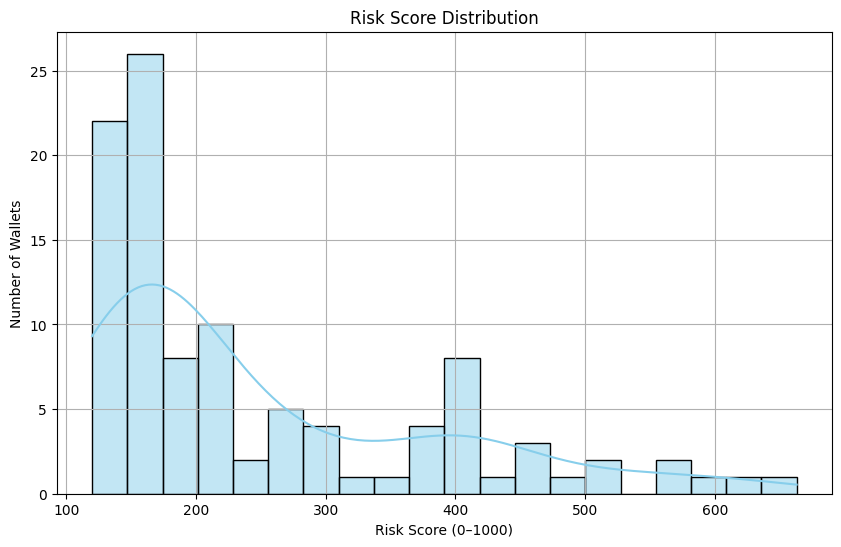

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/content/wallet_risk_scores.csv")

plt.figure(figsize=(10, 6))
sns.histplot(df["risk_score"], bins=20, kde=True, color='skyblue')
plt.title("Risk Score Distribution")
plt.xlabel("Risk Score (0–1000)")
plt.ylabel("Number of Wallets")
plt.grid(True)
plt.show()


Checking the Columns

In [49]:
import pandas as pd

df = pd.read_csv("/content/wallet_risk_scores.csv")
print(df.columns)
print(df.head())


Index(['wallet_address', 'risk_score'], dtype='object')
                               wallet_address  risk_score
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3         663
1  0x06b51c6882b27cb05e712185531c1f74996dd988         167
2  0x0795732aacc448030ef374374eaae57d2965c16c         173
3  0x0aaa79f1a86bc8136cd0d1ca0d51964f4e3766f9         622
4  0x0fe383e5abc200055a7f391f94a5f5d1f844b9ae         168


Value Range Check

In [50]:
print("Min Score:", df["risk_score"].min())
print("Max Score:", df["risk_score"].max())
print("Null values:\n", df.isnull().sum())

Min Score: 120
Max Score: 663
Null values:
 wallet_address    0
risk_score        0
dtype: int64


Row Count Validation

In [51]:
print("Unique wallets:", df["wallet_address"].nunique())
print("Total rows:", len(df))

Unique wallets: 103
Total rows: 103


Checking a Few Wallets

In [52]:
features_df = pd.read_csv("/content/wallet_features.csv")
sample_wallet = df.iloc[0]["wallet_address"]
print("Sample wallet:", sample_wallet)

print("\nFeatures:\n", features_df[features_df["wallet_address"] == sample_wallet])
print("\nScore:\n", df[df["wallet_address"] == sample_wallet])


Sample wallet: 0x0039f22efb07a647557c7c5d17854cfd6d489ef3

Features:
                                wallet_address  total_txns  total_value_eth  \
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3         100        52.254641   

   total_fees_eth  avg_fee_eth  unique_addresses  success_rate  active_days  \
0        2.377481     0.023775               157          0.99          795   

   avg_gas_spent  avg_gas_price  
0     2358265.53   2.052649e+10  

Score:
                                wallet_address  risk_score
0  0x0039f22efb07a647557c7c5d17854cfd6d489ef3         663


RandomForestRegressor Model

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

features_df = pd.read_csv("/content/wallet_features.csv")
scores_df = pd.read_csv("/content/wallet_risk_scores.csv")

df = pd.merge(features_df, scores_df, on="wallet_address")

X = df.drop(["wallet_address", "risk_score"], axis=1)
y = df["risk_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = RandomForestRegressor(n_estimators=100, random_state=7)
model.fit(X_train, y_train)

print("Model R² on test set:", model.score(X_test, y_test))


Model R² on test set: 0.926905745927994


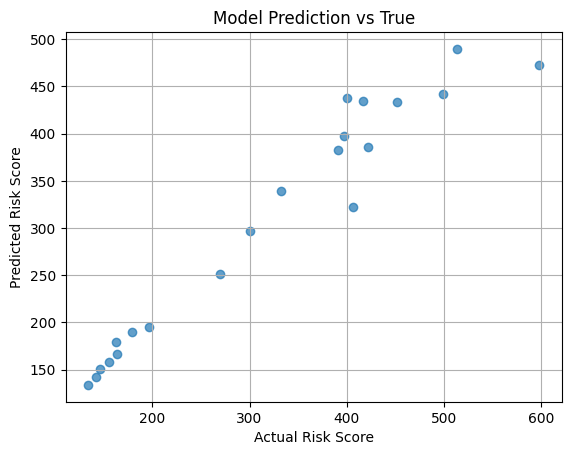

In [54]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Model Prediction vs True")
plt.grid(True)
plt.show()


In [55]:
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor()
scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-val R² scores:", scores)
print("Mean R²:", scores.mean())

Cross-val R² scores: [0.92212881 0.96914251 0.86078308 0.86923121 0.93553862]
Mean R²: 0.9113648478261744


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

final_df = pd.read_csv("/content/wallet_risk_scores.csv")

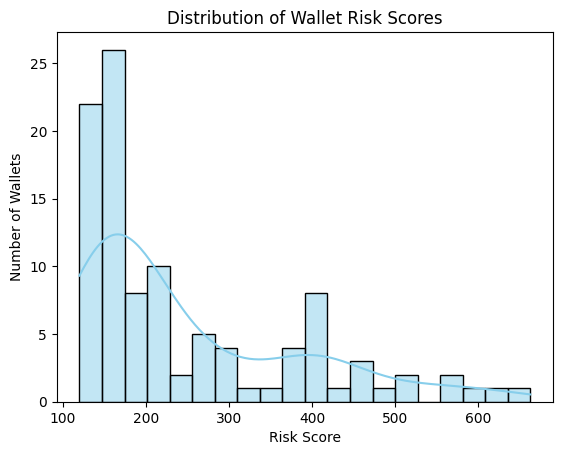

In [57]:
sns.histplot(final_df["risk_score"], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Wallet Risk Scores")
plt.xlabel("Risk Score")
plt.ylabel("Number of Wallets")
plt.show()